In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.data_loading as dl
import data_preprocessing.data_preprocess as dp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pipeline_helper_functions.schofield_model_helper as sm

In [9]:
year = "2025"
df = dl.get_gesis_data(year=year, fill=False)

In [10]:
# party_map = dl.load_party_leaders(year=year)
# # fetch the external valences
# valences = dp.get_valence_from_gesis(politicians=party_map, year=year)  
# valences

In [11]:
df["immigration foreigners more difficult"].value_counts(dropna=False)

immigration foreigners more difficult
11.0    1566
6.0      944
8.0      817
7.0      735
9.0      668
5.0      657
3.0      509
4.0      479
10.0     440
1.0      265
2.0      257
Name: count, dtype: int64

In [12]:
df["more social service, more taxes"].value_counts(dropna=False)

more social service, more taxes
6.0     1464
5.0     1209
1.0      839
3.0      792
4.0      758
7.0      609
8.0      536
9.0      357
2.0      344
11.0     253
10.0     176
Name: count, dtype: int64

In [13]:
df[["second vote"]].value_counts(dropna=False)

second vote
1.0            1864
6.0            1135
4.0            1027
322.0           875
NaN             810
7.0             784
392.0           348
5.0             290
801.0           204
Name: count, dtype: int64

In [ ]:
x_var = "Opposition to Immigration"
y_var = "Welfare State"
year  = "2025"
_, df = dp.get_raw_party_voter_data(x_var=x_var, y_var=y_var, year=year)

df

/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:39: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_filtered = df_filtered.apply(pd.to_numeric, errors="ignore")
/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['Year'] = (pd.to_datetime(df_filtered['Date'], dayfirst=True).dt.ye

,Opposition to Immigration,Welfare State,who did you vote for:second vote,year of birth,bundesland,gender,"do you incline towards a party, if so which one",how strongly do you incline towards this party,Party_Name,party_choice
0,7.0,8.0,6.0,1983,15.0,2.0,6.0,2.0,90/Greens,0
1,7.0,6.0,4.0,1962,15.0,1.0,6.0,2.0,SPD,1
2,4.0,5.0,7.0,2005,15.0,2.0,7.0,2.0,LINKE,2
3,5.0,8.0,6.0,1998,15.0,2.0,6.0,3.0,90/Greens,0
4,8.0,3.0,1.0,1964,15.0,2.0,1.0,2.0,CDU/CSU,3
...,...,...,...,...,...,...,...,...,...,...
5861,4.0,1.0,4.0,1966,13.0,2.0,2.0,3.0,SPD,1
5862,6.0,6.0,322.0,1957,13.0,2.0,322.0,2.0,AfD,4
5863,11.0,4.0,4.0,1969,13.0,1.0,801.0,NaN,SPD,1
5864,1.0,6.0,4.0,1966,13.0,2.0,801.0,NaN,SPD,1


In [ ]:
df["second vote"].value_counts()

who did you vote for:second vote
1.0      1842
6.0      1119
4.0      1014
322.0     858
7.0       751
5.0       282
Name: count, dtype: int64

In [ ]:
# for party in df["second vote"].unique():
party = 322
(df[df["second vote"] == party]["gender"].value_counts()/len(df[df["second vote"] == party])).sort_index()

gender
1.0    0.595571
2.0    0.404429
Name: count, dtype: float64

<Axes: >

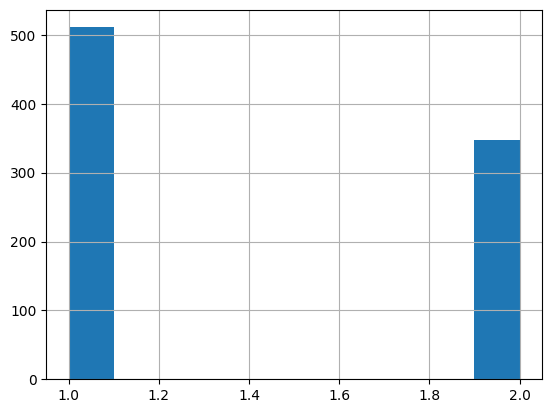

In [ ]:
df[df["second vote"] == party]["gender"].hist()